# Develop Deep Learning Models for Natural Language in Python

## Chapter 12 - How To Develop Word Embeddings with Gensim

In [1]:
# !pip install gensim

from gensim.models import Word2Vec, KeyedVectors
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
sentences = [
  'this is the first sentence for Word2Vec',
  'This is the second sentence',
  'yet another sentence',
  'More more sentence',
  'and the final sentence'
]

tokens = [sentence.lower().split(' ') for sentence in sentences]

## Construction

In [3]:
# Create model
model = Word2Vec(sentences = tokens, min_count = 1)
print('Model:', model)

# Vocab
vocab = list(model.wv.index_to_key)
print('Vocab:', vocab)
print(model.wv['sentence'])

Model: Word2Vec(vocab=13, vector_size=100, alpha=0.025)
Vocab: ['sentence', 'the', 'more', 'is', 'this', 'final', 'and', 'another', 'yet', 'second', 'word2vec', 'for', 'first']
[-5.3622725e-04  2.3643016e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588715e-03  8.9729885e-03
 -5.0154282e-03 -3.7633730e-03  7.3805046e-03 -1.5334726e-03
 -4.5366143e-03  6.5540504e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488189e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508893e-03 -3.4053659e-03 -9.4640255e-04  5.7685734e-03
 -7.5216386e-03 -3.9361049e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337698e-03 -1.9377422e-03
  8.0774352e-03 -5.9308959e-03  4.5161247e-05 -4.7537349e-03
 -9.6035507e-03  5.0072931e-03 -8.7595871e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618264e-04 -7.6612402e-03  9.6147414e-03
  4.9820566e-03  9.2331432e-03 -8.1579182e-03  4.4957972e-03
 -4.1370774e-03  8.2453492e-04

## Save & Load

In [4]:
drive_dir = '/content/drive/MyDrive/NLP-In-Depth/Develop Deep Learning Models for Natural Language in Python/Data'

# Save model
model.save('/word2vec.model.bin')

# Load model
model = Word2Vec.load('/word2vec.model.bin')

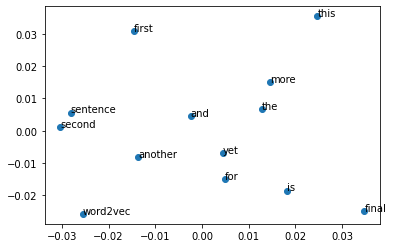

In [10]:
X = model.wv[model.wv.index_to_key]

pca = PCA(n_components = 2)
result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(vocab):
    plt.annotate(word, xy = (result[i, 0], result[i, 1]))
plt.show()

## 12.6 - Load Google's Word2Vec Embedding

In [12]:
filename = '../../../Documents/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary = True)

In [13]:
result = model.most_similar(positive = ['king', 'woman'], negative = ['man'], topn = 1)
print(result)

[('queen', 0.7118193507194519)]
